## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import statsmodels.api as sma
import scipy.stats as spstats
import statsmodels.formula.api as sm
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Reading Excel File

In [2]:
traffic_df = pd.read_excel('/Users/akhilenderk/Desktop/Econ/Metro_Interstate_Traffic_Volume.xlsx')
traffic_df.head()
# Data types of columns
traffic_df.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

In [3]:
# Summary statistics
traffic_df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [4]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'], errors='coerce')

In [5]:
#Taking useful features from date_time column
traffic_df['day'] = traffic_df['date_time'].dt.day
traffic_df['month'] = traffic_df['date_time'].dt.month
traffic_df['year'] = traffic_df['date_time'].dt.year
traffic_df['time'] = traffic_df['date_time'].dt.time
traffic_df['day_of_week']=traffic_df['date_time'].dt.dayofweek    #(Day Index:0=Monday,6=Sunday)

In [6]:
traffic = traffic_df.copy()

In [7]:
#PThe weather_main column is categorical so converting it into multiple binary columns one for each category.
traffic_df=pd.get_dummies(traffic_df,columns=['weather_main'],drop_first=True)

In [8]:
traffic_df.nunique()

traffic_volume                6704
holiday                         11
temp                          5843
rain_1h                        372
snow_1h                         12
clouds_all                      60
weather_description             38
date_time                    40575
day                             31
month                           12
year                             7
time                            24
day_of_week                      7
weather_main_Clouds              2
weather_main_Drizzle             2
weather_main_Fog                 2
weather_main_Haze                2
weather_main_Mist                2
weather_main_Rain                2
weather_main_Smoke               2
weather_main_Snow                2
weather_main_Squall              2
weather_main_Thunderstorm        2
dtype: int64

In [9]:
missing_values = traffic_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 traffic_volume                   0
holiday                      48143
temp                             0
rain_1h                          0
snow_1h                          0
clouds_all                       0
weather_description              0
date_time                        0
day                              0
month                            0
year                             0
time                             0
day_of_week                      0
weather_main_Clouds              0
weather_main_Drizzle             0
weather_main_Fog                 0
weather_main_Haze                0
weather_main_Mist                0
weather_main_Rain                0
weather_main_Smoke               0
weather_main_Snow                0
weather_main_Squall              0
weather_main_Thunderstorm        0
dtype: int64


In [10]:
traffic_df['holiday'] = traffic_df['holiday'].fillna('NONE')

In [11]:
duplicates = traffic_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 17


## Outlier Detection

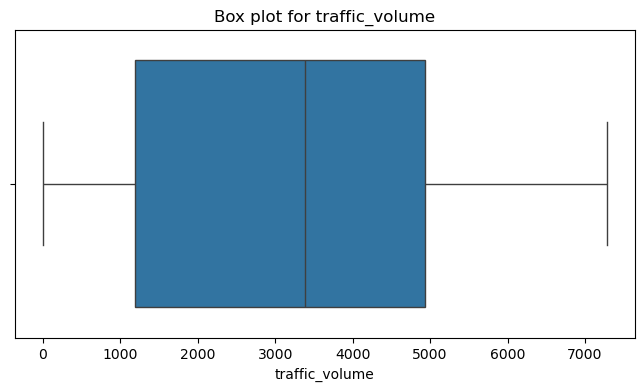

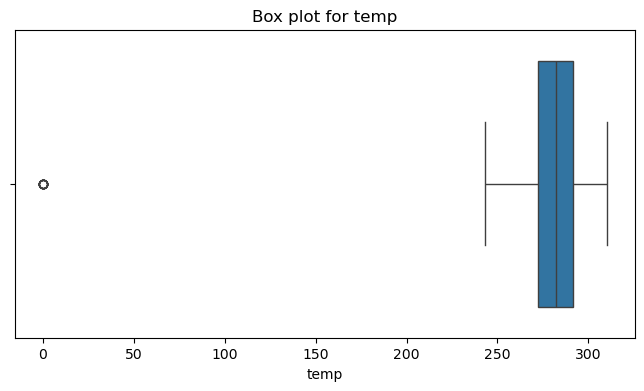

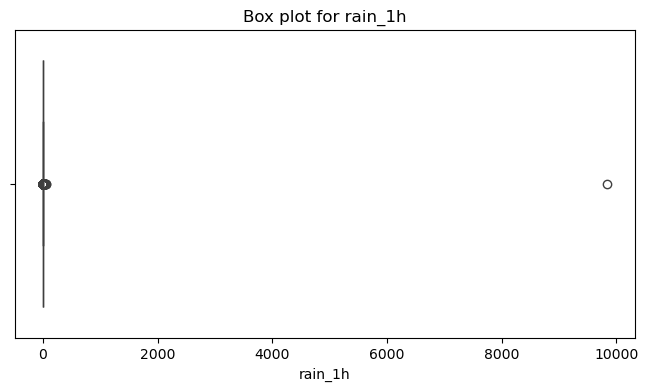

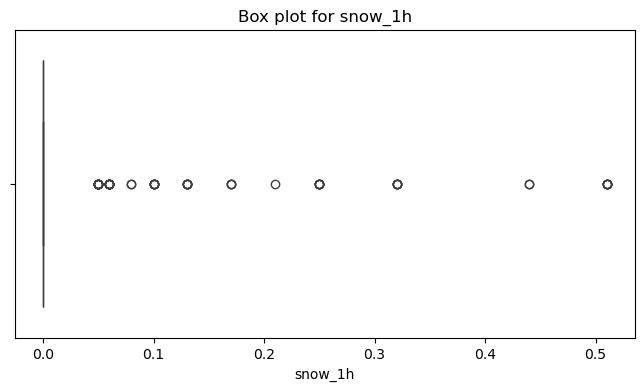

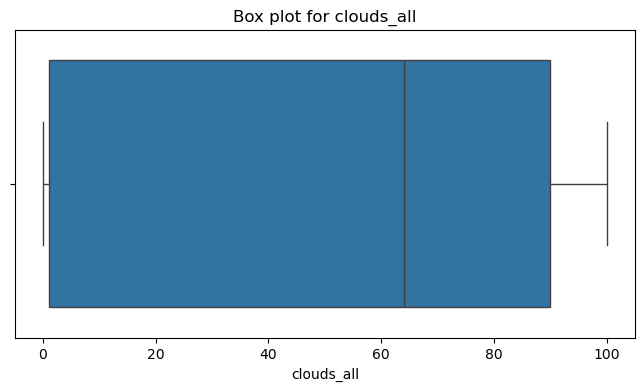

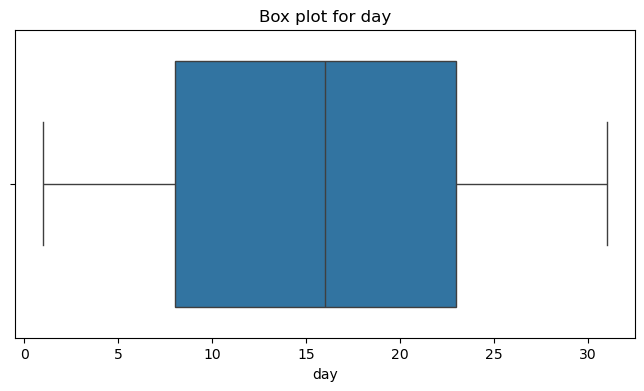

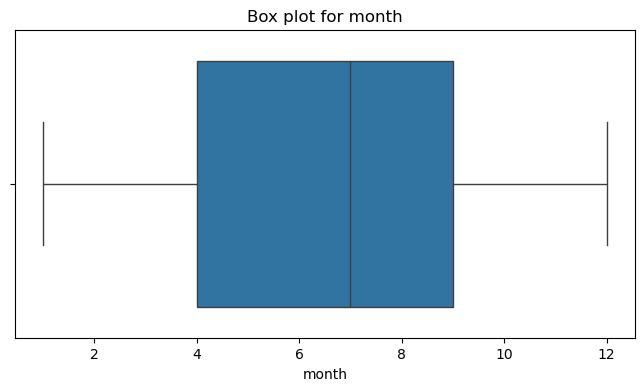

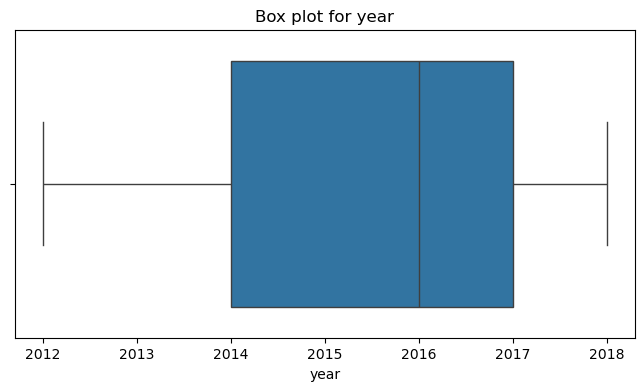

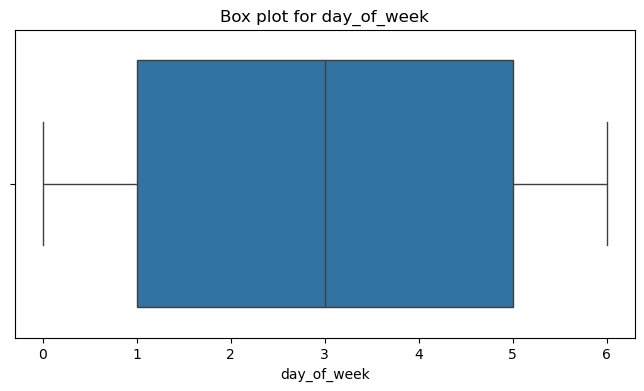

In [12]:
# Box plot for numerical columns to visualize outliers
for column in traffic_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=traffic_df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

/var/folders/dd/jf53nmzx7psc1wx9wj8npcjr0000gn/T/ipykernel_24390/1803944789.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_df['temp'], shade=True, color="blue")
/var/folders/dd/jf53nmzx7psc1wx9wj8npcjr0000gn/T/ipykernel_24390/1803944789.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_df['rain_1h'], shade=True, color="green")
/var/folders/dd/jf53nmzx7psc1wx9wj8npcjr0000gn/T/ipykernel_24390/1803944789.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_df['snow_1h'], shade=True, color="purple")


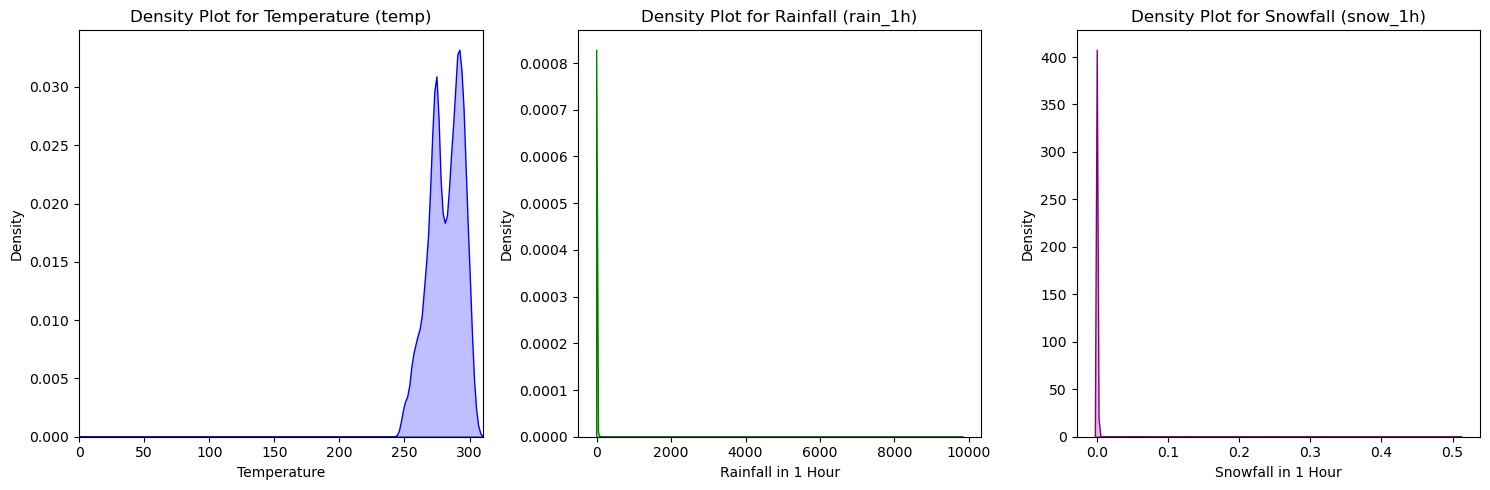

In [13]:
# Density plots for the three columns to have better understanding of outliers

# Plot density for each variable
plt.figure(figsize=(15, 5))

# Density plot for temperature
plt.subplot(1, 3, 1)
sns.kdeplot(traffic_df['temp'], shade=True, color="blue")
plt.title('Density Plot for Temperature (temp)')
plt.xlabel('Temperature')
plt.xlim(traffic_df['temp'].quantile(0.0), traffic_df['temp'].quantile(1.00))  # Focus on 1st to 99th percentile

# Density plot for rainfall
plt.subplot(1, 3, 2)
sns.kdeplot(traffic_df['rain_1h'], shade=True, color="green")
plt.title('Density Plot for Rainfall (rain_1h)')
plt.xlabel('Rainfall in 1 Hour')

# Density plot for snowfall
plt.subplot(1, 3, 3)
sns.kdeplot(traffic_df['snow_1h'], shade=True, color="purple")
plt.title('Density Plot for Snowfall (snow_1h)')
plt.xlabel('Snowfall in 1 Hour')

plt.tight_layout()
plt.show()

/var/folders/dd/jf53nmzx7psc1wx9wj8npcjr0000gn/T/ipykernel_24390/2333907832.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_df['traffic_volume'], shade=True, color="red")


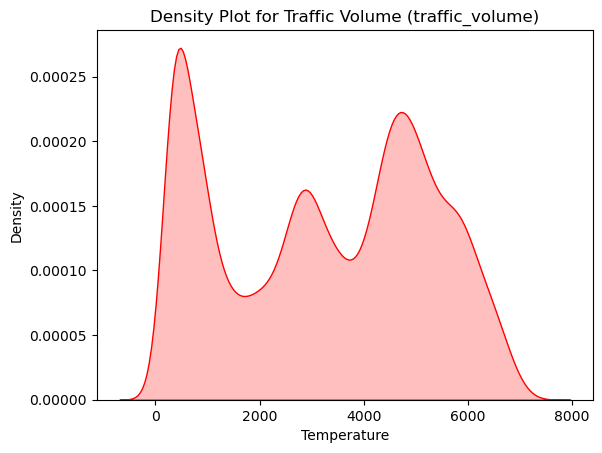

In [14]:
#Density
sns.kdeplot(traffic_df['traffic_volume'], shade=True, color="red")
plt.title('Density Plot for Traffic Volume (traffic_volume)')
plt.xlabel('Temperature')
plt.show()

/Users/akhilenderk/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


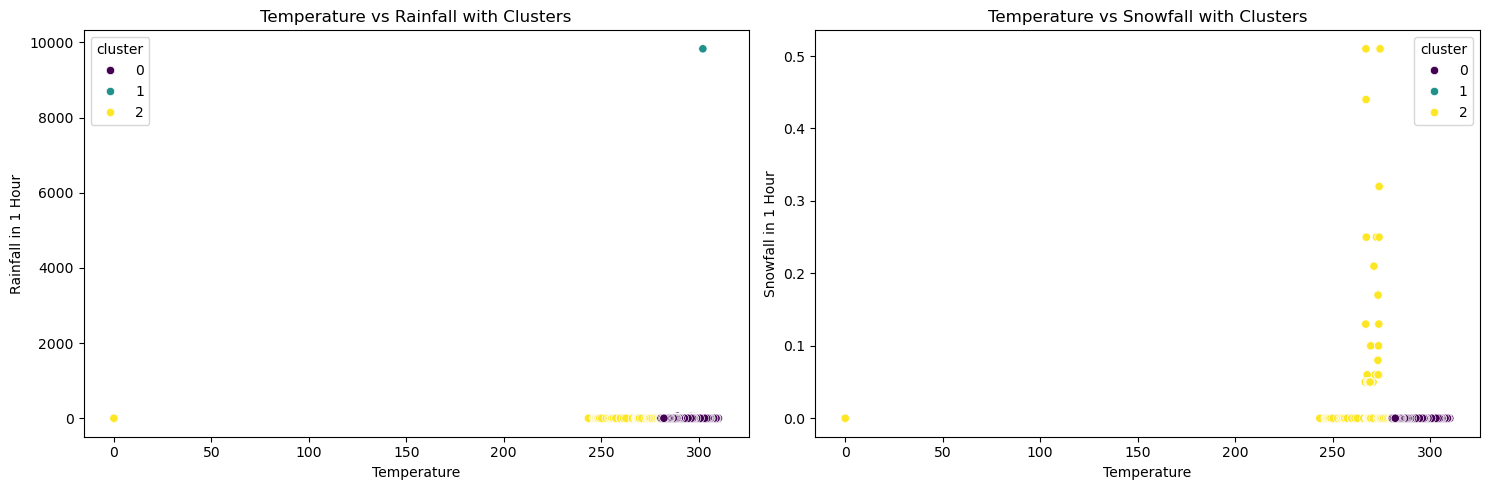

In [15]:
# Fill NaN values with 0 for clustering (or handle missing values as appropriate)
data = traffic_df[['temp', 'rain_1h', 'snow_1h']].fillna(0)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose 3 clusters as an example
data['cluster'] = kmeans.fit_predict(data[['temp', 'rain_1h', 'snow_1h']])

# Scatter plot of temp vs rain_1h colored by cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='rain_1h', hue='cluster', data=data, palette="viridis")
plt.title('Temperature vs Rainfall with Clusters')
plt.xlabel('Temperature')
plt.ylabel('Rainfall in 1 Hour')

# Scatter plot of temp vs snow_1h colored by cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='snow_1h', hue='cluster', data=data, palette="viridis")
plt.title('Temperature vs Snowfall with Clusters')
plt.xlabel('Temperature')
plt.ylabel('Snowfall in 1 Hour')

plt.tight_layout()
plt.show()

## Anamoly Detection

In [16]:
# Select only numeric columns from the DataFrame for anomaly detection
numeric_df = traffic_df.select_dtypes(include=['number'])

# Identify potential anomalies using the specified condition
anomalies = numeric_df[(numeric_df > numeric_df.mean() + 3 * numeric_df.std()) |
                       (numeric_df < numeric_df.mean() - 3 * numeric_df.std())]

# Display the anomalies
print("Potential anomalies:\n", anomalies)

Potential anomalies:
        traffic_volume  temp  rain_1h  snow_1h  clouds_all  day  month  year  \
0                 NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
1                 NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
2                 NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
3                 NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
4                 NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
...               ...   ...      ...      ...         ...  ...    ...   ...   
48199             NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
48200             NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
48201             NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
48202             NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   
48203             NaN   NaN      NaN      NaN         NaN  NaN    NaN   NaN   

       day_of_week  
0       

In [17]:
print("Mean:\n", numeric_df.mean())
print("Standard Deviation:\n", numeric_df.std())

Mean:
 traffic_volume    3259.818355
temp               281.205870
rain_1h              0.334264
snow_1h              0.000222
clouds_all          49.362231
day                 15.705958
month                6.537715
year              2015.512426
day_of_week          3.001141
dtype: float64
Standard Deviation:
 traffic_volume    1986.860670
temp                13.338232
rain_1h             44.789133
snow_1h              0.008168
clouds_all          39.015750
day                  8.750972
month                3.413871
year                 1.893211
day_of_week          1.998085
dtype: float64


In [18]:
anomalies = numeric_df[(numeric_df > numeric_df.mean() + 2 * numeric_df.std()) |
                       (numeric_df < numeric_df.mean() - 2 * numeric_df.std())]

In [19]:
for column in numeric_df.columns:
    anomalies_in_column = numeric_df[(numeric_df[column] > numeric_df[column].mean() + 3 * numeric_df[column].std()) |
                                     (numeric_df[column] < numeric_df[column].mean() - 3 * numeric_df[column].std())]
    print(f"Potential anomalies in {column}:\n", anomalies_in_column)

Potential anomalies in traffic_volume:
 Empty DataFrame
Columns: [traffic_volume, temp, rain_1h, snow_1h, clouds_all, day, month, year, day_of_week]
Index: []
Potential anomalies in temp:
        traffic_volume  temp  rain_1h  snow_1h  clouds_all  day  month  year  \
11898             361   0.0      0.0      0.0           0   31      1  2014   
11899             734   0.0      0.0      0.0           0   31      1  2014   
11900            2557   0.0      0.0      0.0           0   31      1  2014   
11901            5150   0.0      0.0      0.0           0   31      1  2014   
11946             291   0.0      0.0      0.0           0    2      2  2014   
11947             284   0.0      0.0      0.0           0    2      2  2014   
11948             434   0.0      0.0      0.0           0    2      2  2014   
11949             739   0.0      0.0      0.0           0    2      2  2014   
11950             962   0.0      0.0      0.0           0    2      2  2014   
11951            1670

## EDA

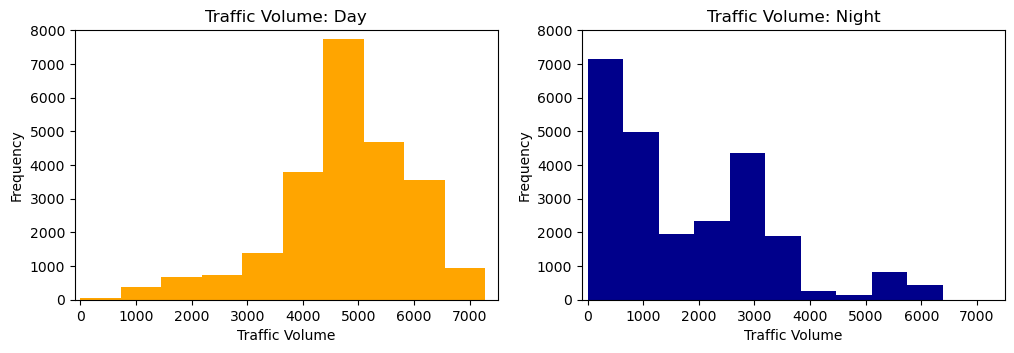

In [20]:
#We will assume the following: 1) Day time - 7 am to 7 pm       2) Night time - 7 pm to 7 am

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
day.describe()

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
night.shape
night.describe()

plt.figure(figsize = (12,3.5))

# plotting day time
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'], color = "orange")
plt.ylim(0,8000)
plt.xlim(-100, 7500)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume: Day')

#plotting night time
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'], color = "darkblue")
plt.ylim(0,8000)
plt.xlim(-100, 7500)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume: Night')


plt.show()

Traffic by Month

int32


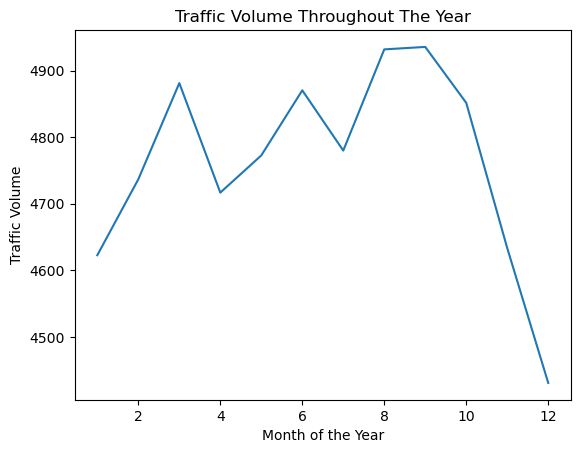

In [21]:
print(day['month'].dtypes)
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')['traffic_volume'].mean()



by_month.plot.line()
plt.xlabel('Month of the Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Throughout The Year')

plt.show()

Summer Peaks: There is a noticeable peak in traffic volume during the summer months, especially around July. This could be attributed to summer vacations, road trips, and other recreational activities that lead to increased travel.

Winter Dip: The traffic volume appears to dip during the winter months, particularly around December and January. This could be due to adverse weather conditions, holidays, and reduced daylight hours.

Week day vs Traffic Volume

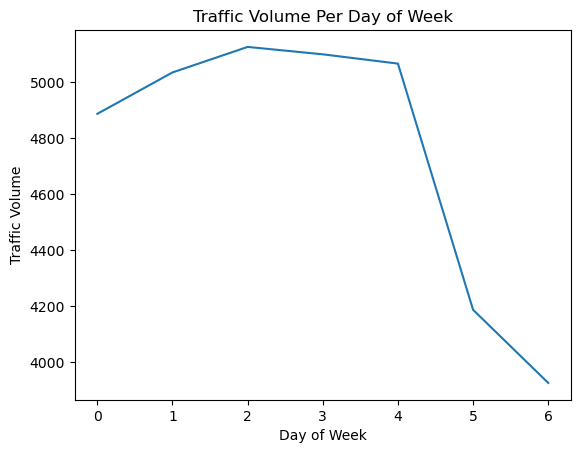

In [22]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')['traffic_volume'].mean()


by_dayofweek.plot.line()
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Per Day of Week')
plt.show()

#Again as expected, Saturday and Sunday have lower traffic volumes than the rest of the week.

Weekend vs Business Day

In [23]:
day['hour'] = day['date_time'].dt.hour

weekend_days = day.copy()[day['dayofweek'] >= 5]
business_days = day.copy()[day['dayofweek'] <= 4]

weekend_days.head()
business_days.head()

by_hour_weekend = weekend_days.groupby('hour')['traffic_volume'].mean()
by_hour_business = business_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend.head()

hour
7     2711.582382
8     3137.225539
9     3564.674783
10    3839.516074
11    4164.141831
Name: traffic_volume, dtype: float64

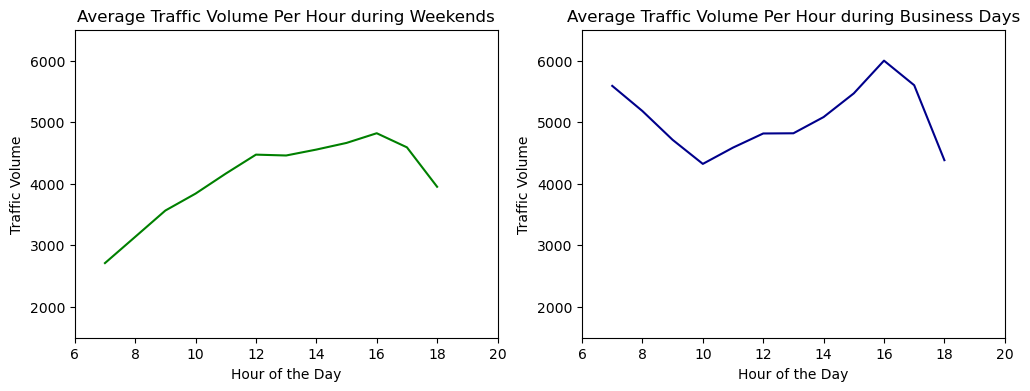

'Given these plots,we can deduce the following:\n\nOn average business days have higher traffic volumes than weekend days.\nWeekend days experience a rise in traffic volumes from early mornings (7 am) and a reach peak mid-day (12 pm)\nThere is a decrease in traffic volumes for business day from 6 - 8 am, this is likely due to rush hour time.\nWe then see another increase from 1 - 4 pm, this is likely due to people coming back from work.'

In [24]:
plt.figure(figsize = (12,4))

# Weekend Days
plt.subplot(1,2,1)
by_hour_weekend.plot.line(color = 'green')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Average Traffic Volume Per Hour during Weekends')

#Business Days
plt.subplot(1,2,2)
by_hour_business.plot.line(color = 'darkblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Average Traffic Volume Per Hour during Business Days')

plt.show()

'''Given these plots,we can deduce the following:

On average business days have higher traffic volumes than weekend days.
Weekend days experience a rise in traffic volumes from early mornings (7 am) and a reach peak mid-day (12 pm)
There is a decrease in traffic volumes for business day from 6 - 8 am, this is likely due to rush hour time.
We then see another increase from 1 - 4 pm, this is likely due to people coming back from work.'''

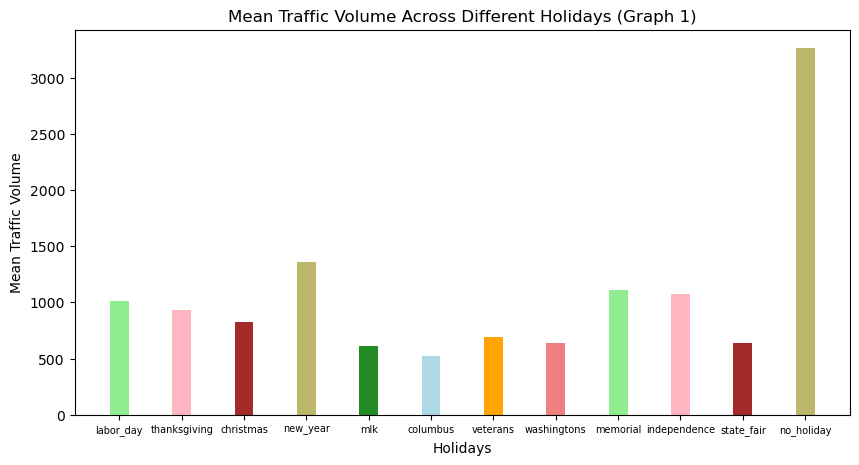

In [25]:
# 1. find the mean traffic_volume grouped by holiday
labor = traffic_df.loc[traffic_df['holiday'] == 'Labor Day', 'traffic_volume'].mean()
thanksgiving = traffic_df.loc[traffic_df['holiday'] == 'Thanksgiving Day', 'traffic_volume'].mean()
christmas = traffic_df.loc[traffic_df['holiday'] == 'Christmas Day', 'traffic_volume'].mean()
new_year = traffic_df.loc[traffic_df['holiday'] == 'New Years Day', 'traffic_volume'].mean()
mlk = traffic_df.loc[traffic_df['holiday'] == 'Martin Luther King Jr Day', 'traffic_volume'].mean()
columbus = traffic_df.loc[traffic_df['holiday'] == 'Columbus Day', 'traffic_volume'].mean()
veterans = traffic_df.loc[traffic_df['holiday'] == 'Veterans Day', 'traffic_volume'].mean()
washingtons = traffic_df.loc[traffic_df['holiday'] == 'Washingtons Birthday', 'traffic_volume'].mean()
memorial = traffic_df.loc[traffic_df['holiday'] == 'Memorial Day', 'traffic_volume'].mean()
independence = traffic_df.loc[traffic_df['holiday'] == 'Independence Day', 'traffic_volume'].mean()
state_fair = traffic_df.loc[traffic_df['holiday'] == 'State Fair', 'traffic_volume'].mean()
no_holiday = traffic_df.loc[traffic_df['holiday'] == 'NONE', 'traffic_volume'].mean()

# 2. Use matplotlib to make a bar graph of the means
data = {'labor_day': labor, 'thanksgiving': thanksgiving, 'christmas': christmas, 'new_year': new_year,
            'mlk': mlk, 'columbus': columbus, 'veterans' : veterans, 'washingtons' :washingtons,
            'memorial': memorial, 'independence': independence, 'state_fair': state_fair,
            'no_holiday': no_holiday}
holidays = list(data.keys())
traffic_v = list(data.values())
fig = plt.figure(figsize = (10,5))
color = {'lightblue', 'lightcoral', 'lightgreen', 'brown', 'darkkhaki','lightpink','forestgreen', 'orange'}
plt.bar(holidays, traffic_v, color = color, width = 0.3)
plt.xlabel('Holidays')
plt.xticks(fontsize=7)
plt.ylabel('Mean Traffic Volume')
plt.title("Mean Traffic Volume Across Different Holidays (Graph 1)")
plt.show()


From Graph 1, the holidays with the highest traffic volume are:

No holiday
New Year
Memorial Day
Independence Day
Labor Day
Non-Holidays: As expected, the traffic volume is higher on non-holidays. This is likely due to the regular work and school commutes.

Holidays: The traffic volume on holidays is significantly lower. This reduction can be attributed to fewer work-related commutes and possibly more people staying at home or traveling outside the region.


In [26]:
traffic.head()
traffic.rename(columns={'weather_main':'weather'}, inplace=True)
traffic.rename(columns={'temp':'temp_real_F'}, inplace=True)
traffic.rename(columns={'clouds_all':'clouds_over'}, inplace=True)

In [27]:
traffic

,traffic_volume,holiday,temp_real_F,rain_1h,snow_1h,clouds_over,weather,weather_description,date_time,day,month,year,time,day_of_week
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,10,2,2012,09:00:00,4
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,10,2,2012,10:00:00,4
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,10,2,2012,11:00:00,4
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,10,2,2012,12:00:00,4
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,10,2,2012,13:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,30,9,2018,19:00:00,6
48200,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,30,9,2018,20:00:00,6
48201,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,30,9,2018,21:00:00,6
48202,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,30,9,2018,22:00:00,6


What weathers have the most severe traffic volume?

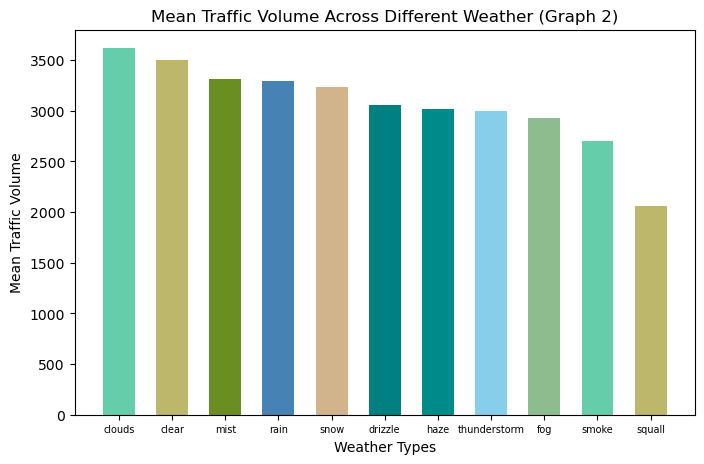

In [28]:
Clouds = traffic.loc[traffic['weather'] == 'Clouds', 'traffic_volume'].mean()
Clear  = traffic.loc[traffic['weather'] == 'Clear', 'traffic_volume'].mean()
Mist   = traffic.loc[traffic['weather'] == 'Mist', 'traffic_volume'].mean()
Rain   = traffic.loc[traffic['weather'] == 'Rain', 'traffic_volume'].mean()
Snow   = traffic.loc[traffic['weather'] == 'Snow', 'traffic_volume'].mean()
Drizzle = traffic.loc[traffic['weather'] == 'Drizzle', 'traffic_volume'].mean()
Haze    = traffic.loc[traffic['weather'] == 'Haze', 'traffic_volume'].mean()
Thunderstorm = traffic.loc[traffic['weather'] == 'Thunderstorm', 'traffic_volume'].mean()
Fog    = traffic.loc[traffic['weather'] == 'Fog', 'traffic_volume'].mean()
Smoke  = traffic.loc[traffic['weather'] == 'Smoke', 'traffic_volume'].mean()
Squall = traffic.loc[traffic['weather'] == 'Squall', 'traffic_volume'].mean()
weather_dict = {'clouds': Clouds, 'clear': Clear, 'mist': Mist, 'rain': Rain,
            'snow': Snow, 'drizzle': Drizzle, 'haze' : Haze, 'thunderstorm' : Thunderstorm,
            'fog': Fog, 'smoke': Smoke, 'squall': Squall}
sorted_values = sorted(weather_dict.values(),reverse=True)
# Update the dictionary with sorted values
weather_dict = dict(zip(weather_dict.keys(), sorted_values))

weather = list(weather_dict.keys())
traffic_v = list(weather_dict.values())
fig = plt.figure(figsize = (8,5))
color = {'tan', 'darkkhaki','olivedrab', 'darkseagreen', 'teal', 'mediumaquamarine','darkcyan','steelblue', 'skyblue'}
plt.bar(weather, traffic_v, color = color, width = 0.6)
plt.xlabel('Weather Types')
plt.xticks(fontsize= 7)
plt.ylabel('Mean Traffic Volume')
plt.title("Mean Traffic Volume Across Different Weather (Graph 2)")
plt.show()

The data suggested that the weather types with the highest traffic volumes are Clouds, Haze, Rain, Drizzle, and Smoke. This is interesting because Clear weather did not make the top 5, even though argurably Clear weather is the best weather for driving condition over more hazardous ones like Rain and Smoke. Perhaps, this suggests that weather is not a significant predictor of traffic volume.

Can temperature predicts traffic volume?

   traffic_volume holiday  temp_real_F  rain_1h  snow_1h  clouds_over weather  \
0            5545     NaN        288.0      0.0      0.0           40  Clouds   
1            4516     NaN        289.0      0.0      0.0           75  Clouds   
2            4767     NaN        290.0      0.0      0.0           90  Clouds   
3            5026     NaN        290.0      0.0      0.0           90  Clouds   
4            4918     NaN        291.0      0.0      0.0           75  Clouds   

  weather_description           date_time  day  month  year      time  \
0    scattered clouds 2012-02-10 09:00:00   10      2  2012  09:00:00   
1       broken clouds 2012-02-10 10:00:00   10      2  2012  10:00:00   
2     overcast clouds 2012-02-10 11:00:00   10      2  2012  11:00:00   
3     overcast clouds 2012-02-10 12:00:00   10      2  2012  12:00:00   
4       broken clouds 2012-02-10 13:00:00   10      2  2012  13:00:00   

   day_of_week  
0            4  
1            4  
2            4  
3     

/var/folders/dd/jf53nmzx7psc1wx9wj8npcjr0000gn/T/ipykernel_24390/2120840071.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  traffic.clouds_cover = traffic.clouds_over /100


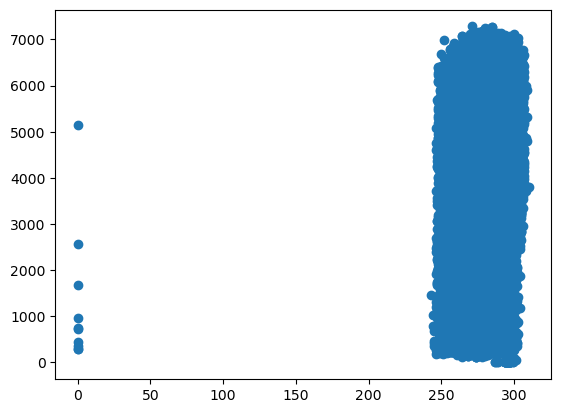

In [29]:
# convert the average temperature from kelvin to Fahrenheit, rounded to 0 decimal place
traffic.temp_real_F = round(traffic.temp_real_F,0)
# change cloud cover to percentage (between 0 and 1)
traffic.clouds_cover = traffic.clouds_over /100
# checking that temperature and cloud cover values are updated
print(traffic.head())

temp = list(traffic['temp_real_F'])
traffic_v = list(traffic['traffic_volume'])
plt.scatter(temp, traffic_v)

Broad Spread: There's a wide distribution of traffic volume across different temperatures, indicating that temperature alone might not be a strong predictor for traffic volume.

Low Temperatures: At extremely low temperatures, we see a reduced spread of traffic volume, which might suggest fewer vehicles on the road during very cold conditions. However, these data points are sparse.

High Concentration: There's a high concentration of data points around the typical temperature range (approximately between 250K and 310K), showcasing the regular variability in traffic volume for standard weather conditions.

Analyzing the relationship between rain (amount of rainfall in the last hour) and traffic volume.



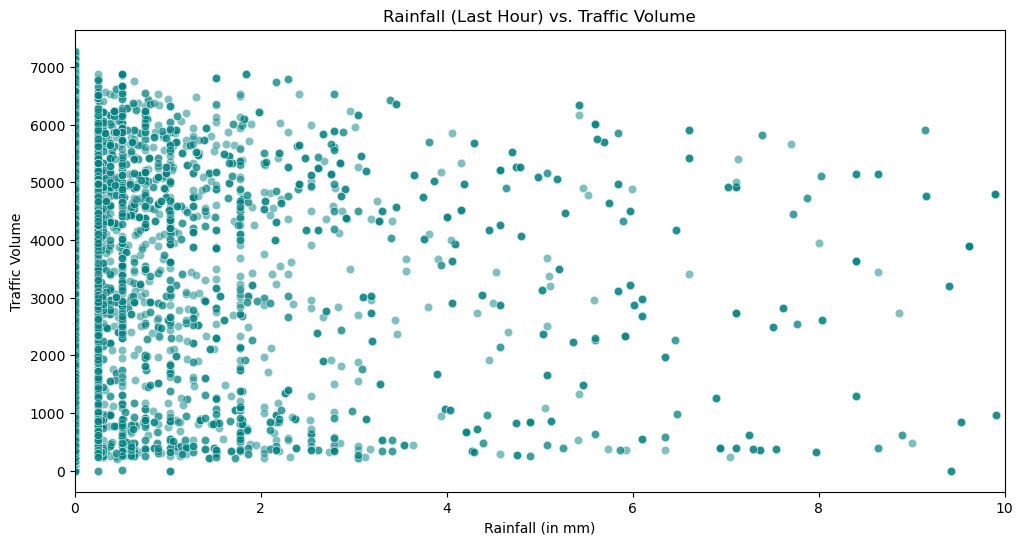

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=traffic, x='rain_1h', y='traffic_volume', alpha=0.5, ax=ax,color = 'teal')
ax.set_title('Rainfall (Last Hour) vs. Traffic Volume')
ax.set_xlabel('Rainfall (in mm)')
ax.set_ylabel('Traffic Volume')
ax.set_xlim(0, 10)  # Limit x-axis to better visualize the data

plt.show()

The scatter plot illustrates the relationship between the amount of rainfall in the last hour and traffic volume:

Predominance of Dry Hours: A majority of the data points are clustered near 0 mm of rainfall, indicating that majority of traffic run during dry or in little rainy hours.

Sparse Data for Rainy Hours: As the rainfall amount increases, the data points become sparse. This suggests that during heavy rainfall hours the traffic volume heavily decreases.

Analyzing the relationship between snow (amount of snowfall in the last hour) and traffic volume.

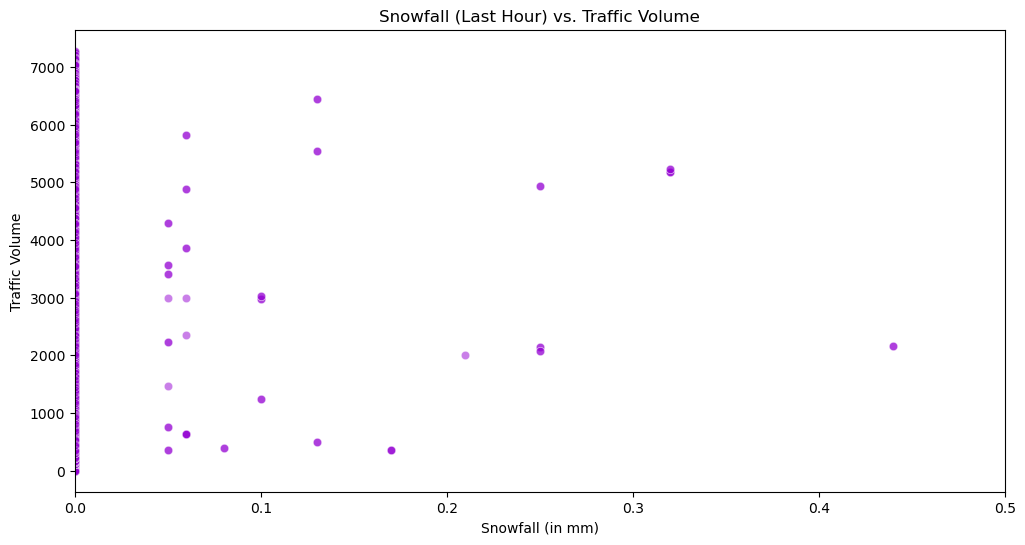

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=traffic, x='snow_1h', y='traffic_volume', alpha=0.5, ax=ax,color='darkviolet')
ax.set_title('Snowfall (Last Hour) vs. Traffic Volume')
ax.set_xlabel('Snowfall (in mm)')
ax.set_ylabel('Traffic Volume')
ax.set_xlim(0, 0.5)  # Limit x-axis to better visualize the data

plt.show()

The scatter plot depicts the relationship between the amount of snowfall in the last hour and traffic volume:

Predominantly Snow-Free Hours: A vast majority of the data points are clustered near 0 mm of snowfall, signifying many hours without snow in the dataset and majority of traffic runs during that time.

Sparse Snow Data: As the amount of snow fall increases, the data points become more dispersed, indicating that heavy snowfall hours are less common in the dataset and traffic volume also drops significantly during this time.

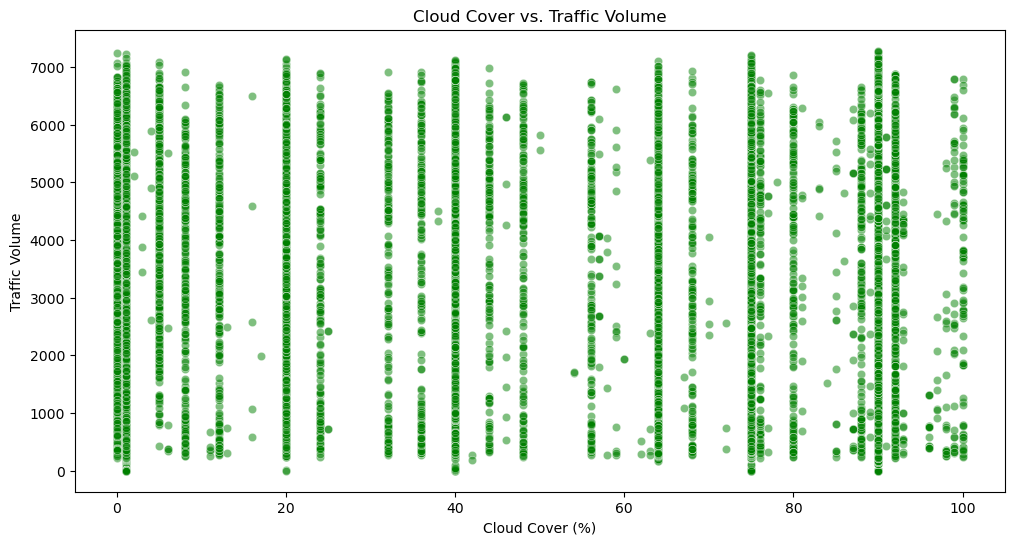

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=traffic, x='clouds_over', y='traffic_volume', alpha=0.5, ax=ax,color = 'green')
ax.set_title('Cloud Cover vs. Traffic Volume')
ax.set_xlabel('Cloud Cover (%)')
ax.set_ylabel('Traffic Volume')

plt.show()

Hypothesis Testing

---



Traffic Volume - weather_main

In [33]:
import pandas as pd
import scipy.stats as stats

# Assuming 'df' is your DataFrame containing the dataset

# Group the traffic volume by weather_main
groups = [group["traffic_volume"].values for name, group in traffic.groupby("weather")]

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The means of traffic volume across weather conditions are significantly different.")
else:
    print("No significant difference in traffic volume means across weather conditions.")

F-statistic: 97.41161247957115
P-value: 8.353544000228533e-201
The means of traffic volume across weather conditions are significantly different.


traffic_volume - weather_description

In [34]:
groups = [group["traffic_volume"].values for name, group in traffic.groupby("weather_description")]

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The means of traffic volume across weather descriptions are significantly different.")
else:
    print("No significant difference in traffic volume means across weatherdescriptions.")

F-statistic: 35.13582793432004
P-value: 2.0336863023704774e-245
The means of traffic volume across weather descriptions are significantly different.


In [35]:
from scipy.stats import chi2_contingency

# Example dataset

# Create a contingency table
contingency_table = pd.crosstab(traffic['weather'], traffic['weather_description'])

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
#print("Degrees of Freedom:", dof)
#print("Expected Frequencies:", expected)


P-value: 0.0


In [36]:
contingency_table = pd.crosstab(traffic['weather'], traffic['weather_description'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
k = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print("Cramér's V:", cramers_v)

Cramér's V: 1.0


In [37]:
day

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day,month,year,time,day_of_week,dayofweek,hour
0,5545,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,10,2,2012,09:00:00,4,4,9
1,4516,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,10,2,2012,10:00:00,4,4,10
2,4767,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,10,2,2012,11:00:00,4,4,11
3,5026,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,10,2,2012,12:00:00,4,4,12
4,4918,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,10,2,2012,13:00:00,4,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48194,4302,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,30,9,2018,15:00:00,6,6,15
48195,4302,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,30,9,2018,15:00:00,6,6,15
48196,4283,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,30,9,2018,16:00:00,6,6,16
48197,4132,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,30,9,2018,17:00:00,6,6,17


  weather_main  traffic_volume
9       Squall     4211.000000
3          Fog     4372.491713
8         Snow     4396.321183
7        Smoke     4564.583333
4         Haze     4609.893285


<Figure size 1200x700 with 0 Axes>

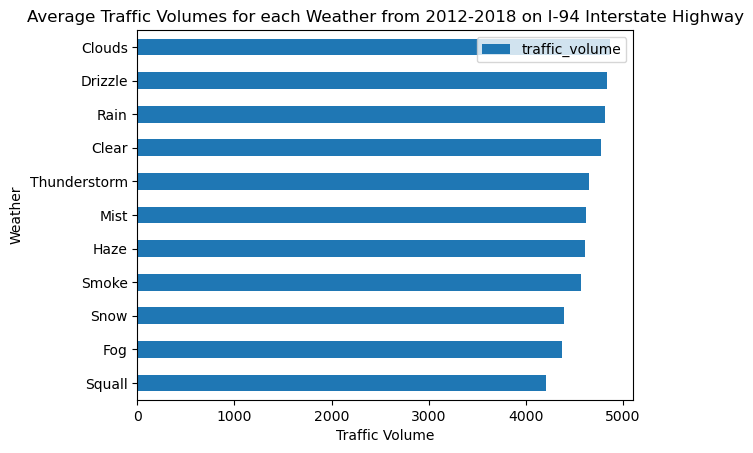

In [38]:

by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main = by_weather_main.reset_index()  
by_weather_main = by_weather_main.sort_values('traffic_volume', ascending=True)  

print(by_weather_main.head())
plt.figure(figsize = (12,7))

by_weather_main.plot.barh(x='weather_main', y='traffic_volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.title('Average Traffic Volumes for each Weather from 2012-2018 on I-94 Interstate Highway')

plt.show()

# Now calculate the mean

### Cyclic Encoding of Time variables

In [39]:
time_df = traffic_df.copy()
# Convert 'time' column to hour as a float (if in datetime.time format)
if pd.api.types.is_datetime64_any_dtype(time_df['time']):
    time_df['time'] = time_df['time'].dt.hour
elif time_df['time'].dtype == 'object':
    time_df['time'] = pd.to_datetime(time_df['time'], format='%H:%M:%S').dt.hour

In [40]:

# Cyclic Encoding for 'month' (values from 1 to 12)
time_df['month_sin'] = np.sin(2 * np.pi * time_df['month'] / 12)
time_df['month_cos'] = np.cos(2 * np.pi * time_df['month'] / 12)

# Cyclic Encoding for 'day' (values from 1 to 31)
time_df['day_sin'] = np.sin(2 * np.pi * time_df['day'] / 31)
time_df['day_cos'] = np.cos(2 * np.pi * time_df['day'] / 31)

# Cyclic Encoding for 'time' (values from 0 to 23 hours)
time_df['time_sin'] = np.sin(2 * np.pi * time_df['time'] / 24)
time_df['time_cos'] = np.cos(2 * np.pi * time_df['time'] / 24)

In [41]:
time_df.drop(['date_time','weather_description','year','holiday'], axis=1, inplace=True)
time_df.head(2)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,day,month,time,day_of_week,weather_main_Clouds,...,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,month_sin,month_cos,day_sin,day_cos,time_sin,time_cos
0,5545,288.28,0.0,0.0,40,10,2,9,4,True,...,False,False,False,False,0.866025,0.5,0.897805,-0.440394,0.707107,-0.707107
1,4516,289.36,0.0,0.0,75,10,2,10,4,True,...,False,False,False,False,0.866025,0.5,0.897805,-0.440394,0.500000,-0.866025


In [42]:
## Applying Necessary Dataset changes to main final dataset
traffic_df = time_df.copy()

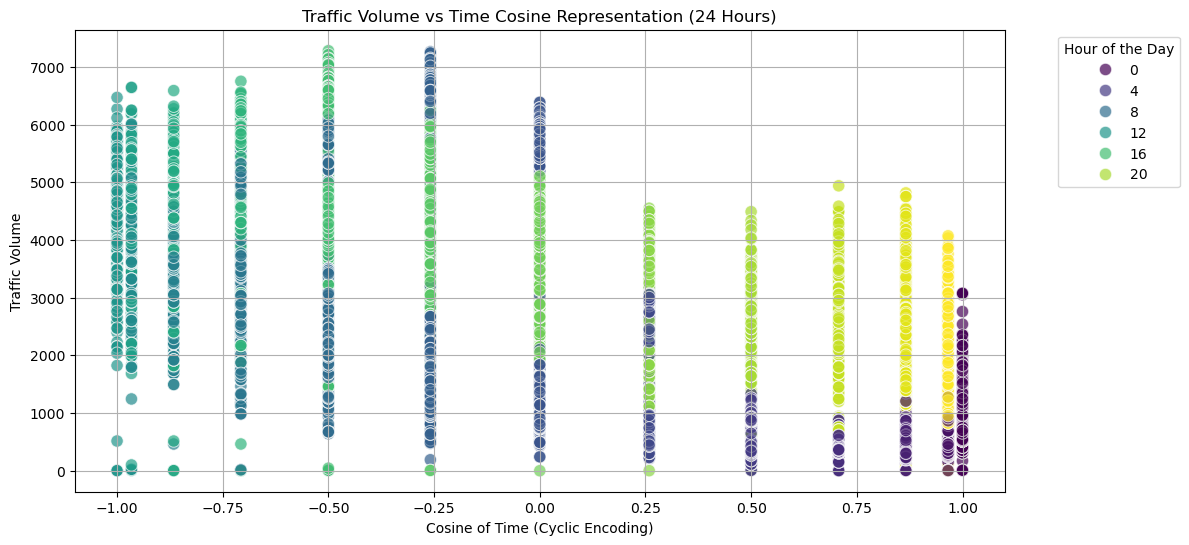

In [43]:
# Plotting traffic_vol vs time_cos with hours as color gradient
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=time_df, x='time_cos', y='traffic_volume', hue='time', palette='viridis', s=80, alpha=0.7)
plt.title('Traffic Volume vs Time Cosine Representation (24 Hours)')
plt.xlabel('Cosine of Time (Cyclic Encoding)')
plt.ylabel('Traffic Volume')

# Add a legend for the 'hour' hue
plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Correlation Matrix

In [44]:
#Correlation Analysis which calculates correlations between all numeric features in the dataset.
correlation_matrix=traffic_df.corr()
traffic_corr=correlation_matrix['traffic_volume'].sort_values(ascending=False)

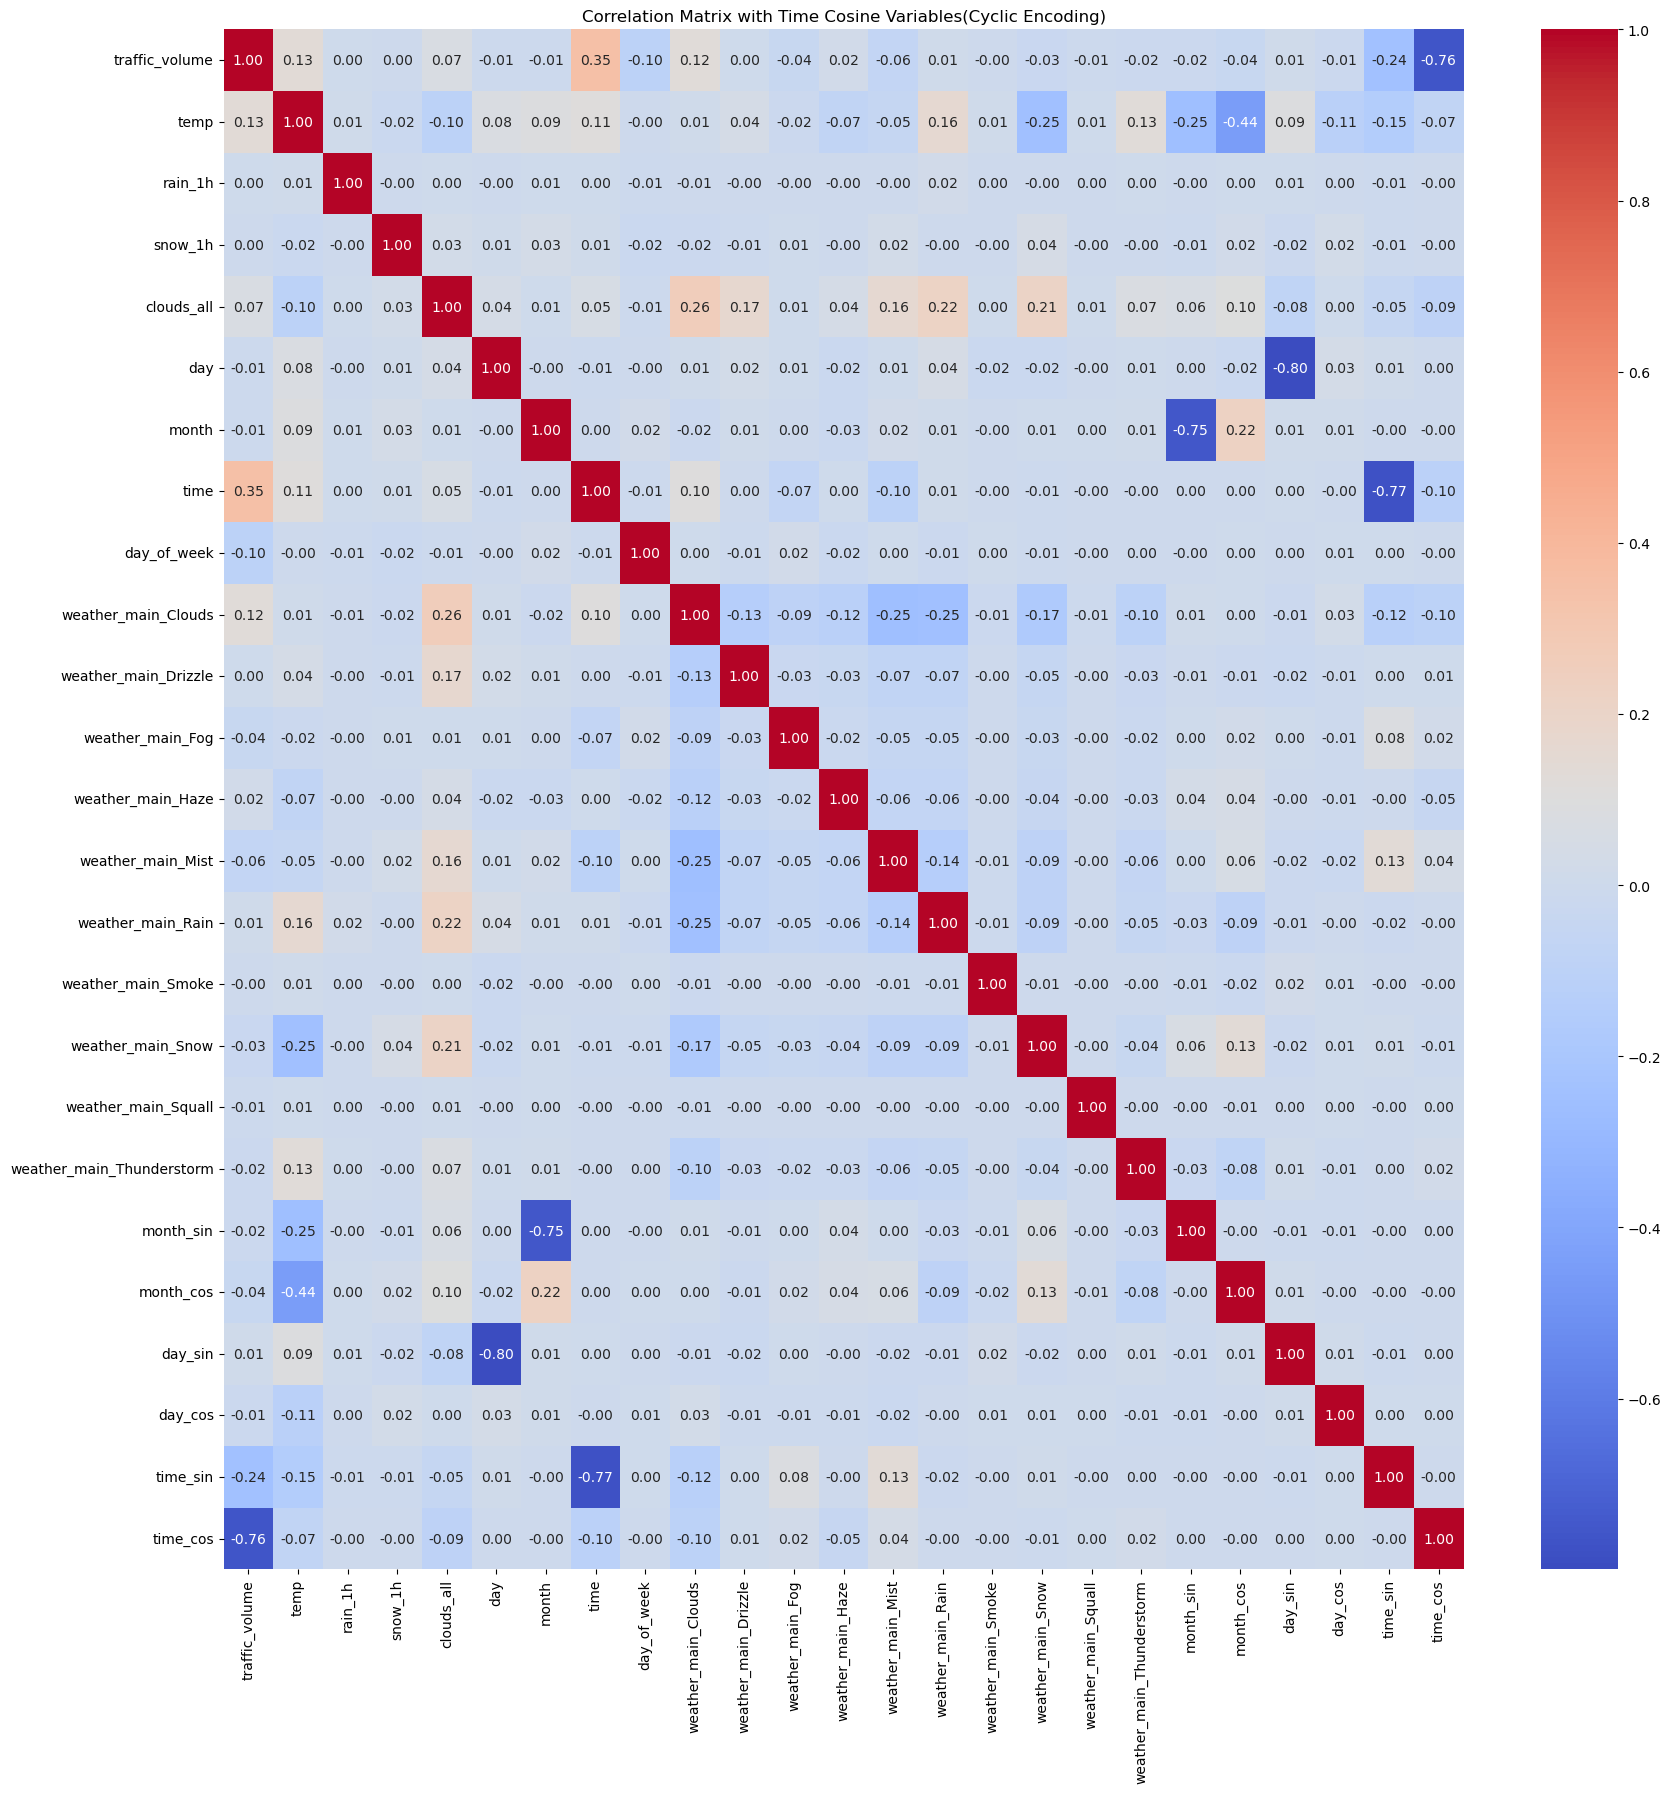

In [45]:
#Plotting heatmap for correlation of the features in the dataset
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.title('Correlation Matrix with Time Cosine Variables(Cyclic Encoding)')
plt.show()

In [46]:
#Displays which variables are strongly correlated with the target variable
print("Feature Correlations with Traffic Volume:")
print(traffic_corr)

Feature Correlations with Traffic Volume:
traffic_volume               1.000000
time                         0.352401
temp                         0.130299
weather_main_Clouds          0.122285
clouds_all                   0.067054
weather_main_Haze            0.020778
weather_main_Rain            0.010676
day_sin                      0.009405
rain_1h                      0.004714
weather_main_Drizzle         0.003082
snow_1h                      0.000733
weather_main_Smoke          -0.000227
weather_main_Squall         -0.005493
day                         -0.005767
month                       -0.007128
day_cos                     -0.013304
month_sin                   -0.016027
weather_main_Thunderstorm   -0.019241
weather_main_Snow           -0.030804
month_cos                   -0.036288
weather_main_Fog            -0.038868
weather_main_Mist           -0.061734
day_of_week                 -0.101328
time_sin                    -0.244211
time_cos                    -0.764252
Name: tr

## Stats Models

### Multiple Linear Regression (Without Log Transformation)

In [47]:
#Defining features and target variable
X=traffic_df.drop(columns=['traffic_volume'])
y=traffic_df['traffic_volume']

In [48]:
#Splitting the dataset into test set(20%) and train set(80%) for model evaluation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
# Convert boolean columns to integers (0 and 1)
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes(include=['bool']).columns})
 
# Check for and handle any NaN values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
 
# Convert everything to float64 to avoid dtype issues
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
 
# Adding a constant term for the intercept for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
 
# Ensure target variable is a NumPy array (in case it's still a Pandas Series)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [50]:
# Fit the OLS model with statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()
 
# Predicting the traffic volume on the test set
y_pred = ols_model.predict(X_test_sm)
 
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
 
# Number of test observations
n = X_test.shape[0]
 
# Number of features for Linear Regression
linear_k = X_train.shape[1]
 
# Function to calculate Adjusted R-squared value of Linear Regression
def adjusted_r2(linear_r2, n, linear_k):
    return 1 - ((1 - linear_r2) * (n - 1) / (n - linear_k - 1))
 
adj_r2 = adjusted_r2(r2, n, linear_k)
 
# Rounding metrics
rounded_mse = round(mse, 2)
rounded_rmse = round(rmse, 2)
rounded_mae = round(mae, 2)
rounded_r2 = round(r2, 2)
rounded_adj_r2 = round(adj_r2, 2)
 
# Creating a DataFrame for the regression metrics
results = {
    "Metrics": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", 
                "R-squared (R2)", "Adjusted R-squared"],
    "Multiple Linear Regression(Without Log)": [rounded_mse, rounded_rmse, rounded_mae, rounded_r2, rounded_adj_r2],
}
 
mlr_metrics_df = pd.DataFrame(results)
 
# Creating a DataFrame for coefficients and p-values
mlr_coefficients_df = pd.DataFrame({
    'Coefficient': ols_model.params,
    'P-Value': ols_model.pvalues
})
 
# Resetting index for better readability
mlr_coefficients_df.reset_index(inplace=True)
mlr_coefficients_df.columns = ['Feature', 'Coefficient', 'P-Value']
 
print("\nCoefficients and P-Values:\n")
mlr_coefficients_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Coefficients and P-Values:



,Feature,Coefficient,P-Value
0,const,2008.501697,4.199532e-37
1,temp,3.512067,5.331383e-10
2,rain_1h,0.075113,5.149605e-01
3,snow_1h,-978.070207,1.508938e-01
4,clouds_all,-1.195783,6.000789e-07
5,day,1.182240,3.049396e-01
6,month,-16.627556,1.563108e-09
7,time,60.188415,0.000000e+00
8,day_of_week,-102.091863,3.193158e-268
9,weather_main_Clouds,108.594188,2.870317e-07


### Multiple Linear Regression (With Log Transformation)

In [51]:
traffic_df['log_traffic_vol'] = np.log1p(traffic_df['traffic_volume'])

In [52]:
#Defining features and target variable
X=traffic_df.drop(columns=['traffic_volume','log_traffic_vol'])
y=traffic_df['log_traffic_vol']

In [53]:
#Splitting the dataset into test set(20%) and train set(80%) for model evaluation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
# Convert boolean columns to integers (0 and 1)
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes(include=['bool']).columns})
 
# Check for and handle any NaN values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
 
# Convert everything to float64 to avoid dtype issues
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
 
# Adding a constant term for the intercept for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
 
# Ensure target variable is a NumPy array (in case it's still a Pandas Series)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [55]:
# Fit the OLS model with statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()
 
# Predicting the traffic volume on the test set
y_pred = ols_model.predict(X_test_sm)
 
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
 
# Number of test observations
n = X_test.shape[0]
 
# Number of features for Linear Regression
linear_k = X_train.shape[1]
 
# Function to calculate Adjusted R-squared value of Linear Regression
def adjusted_r2(linear_r2, n, linear_k):
    return 1 - ((1 - linear_r2) * (n - 1) / (n - linear_k - 1))
 
adj_r2 = adjusted_r2(r2, n, linear_k)
 
# Rounding metrics
rounded_mse = round(mse, 2)
rounded_rmse = round(rmse, 2)
rounded_mae = round(mae, 2)
rounded_r2 = round(r2, 2)
rounded_adj_r2 = round(adj_r2, 2)
 
# Creating a DataFrame for the regression metrics
results = {
    "Metrics": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", 
                "R-squared (R2)", "Adjusted R-squared"],
    "Multiple Linear Regression(Log)": [rounded_mse, rounded_rmse, rounded_mae, rounded_r2, rounded_adj_r2],
}
 
log_mlr_metrics_df = pd.DataFrame(results)
 
# Creating a DataFrame for coefficients and p-values
log_mlr_coefficients_df = pd.DataFrame({
    'Coefficient': ols_model.params,
    'P-Value': ols_model.pvalues
})
 
# Resetting index for better readability
log_mlr_coefficients_df.reset_index(inplace=True)
log_mlr_coefficients_df.columns = ['Feature', 'Coefficient', 'P-Value']
 
print("\nCoefficients and P-Values:\n")
log_mlr_coefficients_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Coefficients and P-Values:



,Feature,Coefficient,P-Value
0,const,6.840090,0.000000e+00
1,temp,0.001092,4.599940e-05
2,rain_1h,0.000013,8.170430e-01
3,snow_1h,-0.486293,1.317515e-01
4,clouds_all,-0.000532,2.770209e-06
5,day,0.000915,9.393682e-02
6,month,-0.005122,8.633238e-05
7,time,0.064248,0.000000e+00
8,day_of_week,-0.028193,2.167905e-93
9,weather_main_Clouds,0.030451,2.386789e-03


### Simple Linear Regression

In [56]:
#Defining features and target variable
X=pd.DataFrame(traffic_df.time_cos)
y=traffic_df['traffic_volume']

In [57]:
#Splitting the dataset into test set(20%) and train set(80%) for model evaluation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
# Convert boolean columns to integers (0 and 1)
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes(include=['bool']).columns})
 
# Check for and handle any NaN values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
 
# Convert everything to float64 to avoid dtype issues
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
 
# Adding a constant term for the intercept for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
 
# Ensure target variable is a NumPy array (in case it's still a Pandas Series)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [59]:
# Fit the OLS model with statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()
 
# Predicting the traffic volume on the test set
y_pred = ols_model.predict(X_test_sm)
 
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
 
# Number of test observations
n = X_test.shape[0]
 
# Number of features for Linear Regression
linear_k = X_train.shape[1]
 
# Function to calculate Adjusted R-squared value of Linear Regression
def adjusted_r2(linear_r2, n, linear_k):
    return 1 - ((1 - linear_r2) * (n - 1) / (n - linear_k - 1))
 
adj_r2 = adjusted_r2(r2, n, linear_k)
 
# Rounding metrics
rounded_mse = round(mse, 2)
rounded_rmse = round(rmse, 2)
rounded_mae = round(mae, 2)
rounded_r2 = round(r2, 2)
rounded_adj_r2 = round(adj_r2, 2)
 
# Creating a DataFrame for the regression metrics
results = {
    "Metrics": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", 
                "R-squared (R2)", "Adjusted R-squared"],
    "Simple Linear Regression": [rounded_mse, rounded_rmse, rounded_mae, rounded_r2, rounded_adj_r2],
}
 
slr_metrics_df = pd.DataFrame(results)
 
# Creating a DataFrame for coefficients and p-values
slr_coefficients_df = pd.DataFrame({
    'Coefficient': ols_model.params,
    'P-Value': ols_model.pvalues
})
 
# Resetting index for better readability
slr_coefficients_df.reset_index(inplace=True)
slr_coefficients_df.columns = ['Feature', 'Coefficient', 'P-Value']
 
print("\nCoefficients and P-Values:\n")
slr_coefficients_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Coefficients and P-Values:



,Feature,Coefficient,P-Value
0,const,3272.514604,0.0
1,time_cos,-2149.732856,0.0


In [60]:
# First, merge mlr_metrics_df and log_mlr_metrics_df
combined_metrics = pd.merge(mlr_metrics_df, log_mlr_metrics_df, on="Metrics")

# Then, merge the result with slr_metrics_df
combined_metrics = pd.merge(combined_metrics, slr_metrics_df, on="Metrics")

# Now, combined_metrics should contain the merged data from all three dataframes
combined_metrics


,Metrics,Multiple Linear Regression(Without Log),Multiple Linear Regression(Log),Simple Linear Regression
0,Mean Squared Error (MSE),1255136.40,0.27,1626281.32
1,Root Mean Squared Error (RMSE),1120.33,0.52,1275.26
2,Mean Absolute Error (MAE),851.00,0.38,1040.36
3,R-squared (R2),0.68,0.72,0.59
4,Adjusted R-squared,0.68,0.72,0.59
